In [11]:
import pandas as pd
import numpy as np 
import re

import seaborn as sns

In [12]:
phishing_raw_df = pd.read_csv("Main_dataset.csv", header = 0)

In [13]:
phishing_raw_df = phishing_raw_df.dropna()

In [14]:
phishing_raw_df = phishing_raw_df.drop_duplicates()
phishing_raw_df.shape

(72363, 12)

In [15]:
phishing_raw_df.head()

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1


In [16]:
print(phishing_raw_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72363 entries, 0 to 95909
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   domain          72363 non-null  object
 1   ranking         72363 non-null  int64 
 2   isIp            72363 non-null  int64 
 3   valid           72363 non-null  int64 
 4   activeDuration  72363 non-null  int64 
 5   urlLen          72363 non-null  int64 
 6   is@             72363 non-null  int64 
 7   isredirect      72363 non-null  int64 
 8   haveDash        72363 non-null  int64 
 9   domainLen       72363 non-null  int64 
 10  nosOfSubdomain  72363 non-null  int64 
 11  label           72363 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 7.2+ MB
None


In [17]:
phishing_raw_df.head()

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1


In [18]:
phishing_raw_df.groupby(["label"])[["label"]].count()

,label
label,
0,31025
1,41338


In [19]:
# Function to check for '//' or 'http' in the domain part of the URL
# Returns 1 if '//' is found within length of 7 for the given URL or if 'http' is found else returns 0
# Legitimate - 0; Phishing - 1

def regexp_check(str_to_check,url):
    if str_to_check == '//':
        double_slash = re.search(str_to_check,url)
        if double_slash:
            if double_slash.start() > 7:
                return 1
            else:
                return 0
        else:
            return 0
    else:
        http_domain = re.search('http',url)
        if http_domain:
            return 1
        else:
            return 0


In [20]:
# Feature engineering

# Insert a new column to the dataframe which shows if the URL has a '//' in the domain part.
phishing_raw_df["dslash_Redirect"] = phishing_raw_df["domain"].apply( lambda x: regexp_check('//',x))

# Insert a new column to the dataframe which shows if 'http' is found in the domain part of the URL.
phishing_raw_df["Domain_http"] = phishing_raw_df["domain"].apply( lambda x: regexp_check('http',x))

# Insert a new column to the dataframe indication the length of the URL.
# If the lenght is less than 54 then it is a legitimate site else it is a phishing site.
phishing_raw_df["LongURL"] = phishing_raw_df["domain"].apply( lambda x: 0 if len(x) < 54 else 1)

# Alter the values in 'nosOfSubdomain' column of the dataframe.
# If the number of sub domains is more than 1, then it is a phishing site.
phishing_raw_df["nosOfSubdomain"] = phishing_raw_df["nosOfSubdomain"].apply( lambda x: 0 if x ==1 else 1)

# Alter the values in 'activeDuration' column of the dataframe.
# If the value is greater than 365 (1 year), then it is a legitimate site.
phishing_raw_df["activeDuration"] = phishing_raw_df["activeDuration"].apply( lambda x: 1 if x <= 365 else 0)

# Alter the values in the dataframe column 'ranking'
# If the value is greater than 100000, then it is a phishing site
phishing_raw_df["ranking"] = phishing_raw_df["ranking"].apply( lambda x: 0 if x < 100000 else 1)

# Remove the unwanted columns from the dataframe
phishing_raw_df.drop(['urlLen','domainLen'], inplace=True,axis=1)

# Reorder and rename the columns in the dataframe
Columns = ['Domain','Rank','isIP','isValid','Domain_reg_len','is@','isRedirect','haveDash','SubDomain','Label','dslash_Redirect','Domain_http','LongURL']
new_columns = ['Domain','Rank','isIP','isValid','Domain_reg_len','is@','isRedirect','haveDash','SubDomain','dslash_Redirect','Domain_http','LongURL','Label']
phishing_raw_df.columns = Columns
phishing_raw_df = phishing_raw_df.reindex(columns=new_columns)

#Display the dataset after feature engineering
phishing_raw_df.head()

,Domain,Rank,isIP,isValid,Domain_reg_len,is@,isRedirect,haveDash,SubDomain,dslash_Redirect,Domain_http,LongURL,Label
0,www.voting-yahoo.com,1,0,0,1,0,0,1,1,0,0,0,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,1,0,1,0,0,0,0,1,0,0,0,0
2,tecportais.com/file-security-update-infonfmati...,1,0,0,1,0,0,0,0,0,0,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,0,0,0,1,0,0,0,1,0,0,0,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,1,0,1,0,0,0,1,0,0,0,1,1


In [21]:
phishing_raw_df.head()

,Domain,Rank,isIP,isValid,Domain_reg_len,is@,isRedirect,haveDash,SubDomain,dslash_Redirect,Domain_http,LongURL,Label
0,www.voting-yahoo.com,1,0,0,1,0,0,1,1,0,0,0,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,1,0,1,0,0,0,0,1,0,0,0,0
2,tecportais.com/file-security-update-infonfmati...,1,0,0,1,0,0,0,0,0,0,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,0,0,0,1,0,0,0,1,0,0,0,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,1,0,1,0,0,0,1,0,0,0,1,1


In [26]:
phishing_raw_df.describe()

,Rank,isIP,isValid,Domain_reg_len,is@,isRedirect,haveDash,SubDomain,dslash_Redirect,Domain_http,LongURL,Label
count,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000,72363.000000
mean,0.691610,0.000207,0.574727,0.430980,0.002709,0.007504,0.155508,0.767768,0.007476,0.019527,0.389343,0.571259
std,0.461832,0.014396,0.494388,0.495217,0.051974,0.086300,0.362390,0.422259,0.086142,0.138367,0.487605,0.494900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

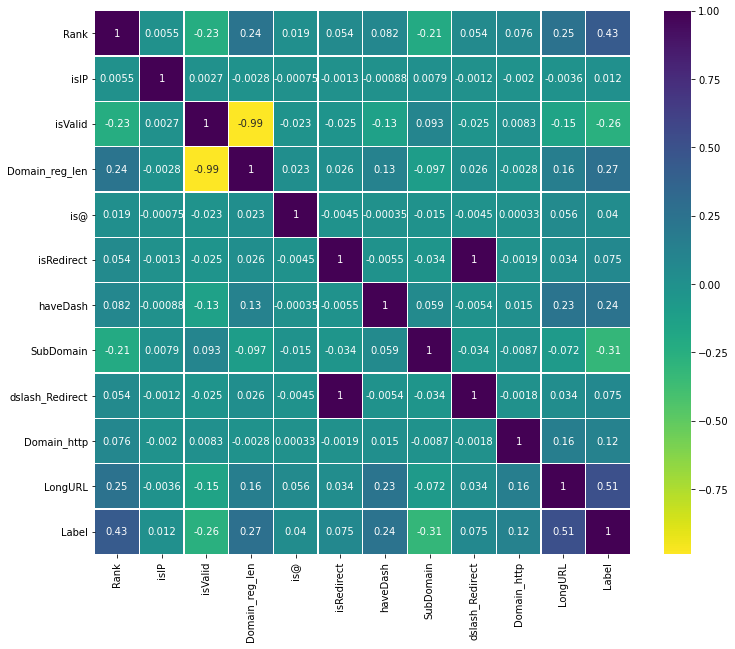

In [27]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,10))
sns.heatmap(phishing_raw_df.corr(),annot=True,linewidths=.3,cmap='viridis_r')

In [28]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X= phishing_raw_df.drop(['Label','Domain'], axis=1)
y= phishing_raw_df.Label
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 50654 samples.
Testing set has 21709 samples.


In [29]:
# fit the model with data
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

importance = logreg.coef_

y_pred=logreg.predict(X_test)

# coefficeints of the trained model
print('Coefficient of model :', logreg.coef_)

# intercept of the model
print('Intercept of model',logreg.intercept_)

Coefficient of model : [[ 1.64255096  1.207957    0.4685698   1.32630987  1.25757527  2.18754941
   1.2527142  -2.07740483  2.16789508  2.23754419  2.51981971]]
Intercept of model [-0.96288716]


In [30]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [31]:
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 21709 points : 4163


In [32]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7927 1267]
 [2896 9619]]


In [33]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79      9194
           1       0.88      0.77      0.82     12515

    accuracy                           0.81     21709
   macro avg       0.81      0.82      0.81     21709
weighted avg       0.82      0.81      0.81     21709



In [34]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,y_pred)

0.6163020897776406

In [35]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.8153952085863291

average_precision_score 0.8125430129355884


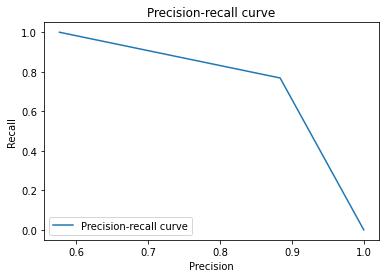

In [48]:
from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

#create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

from sklearn.metrics import average_precision_score
print('average_precision_score',average_precision_score(y_test, y_pred))

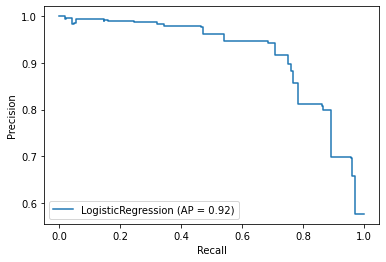

In [49]:
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

plot_precision_recall_curve(logreg, X_test, y_test)

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
clf = RandomForestClassifier(criterion='entropy',random_state=0)
clf.fit(X_train, y_train)

y_pred1=clf.predict(X_test)

In [42]:
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.83


In [43]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred1)
print(confusion_matrix)

[[ 7207  1987]
 [ 1643 10872]]


In [44]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      9194
           1       0.85      0.87      0.86     12515

    accuracy                           0.83     21709
   macro avg       0.83      0.83      0.83     21709
weighted avg       0.83      0.83      0.83     21709



In [45]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,y_pred1)

0.6558542174822143

In [46]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred1)

0.8262991653870043

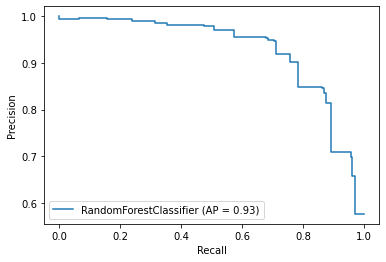

In [47]:
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

plot_precision_recall_curve(clf, X_test, y_test)

average_precision_score 0.8101643556670898


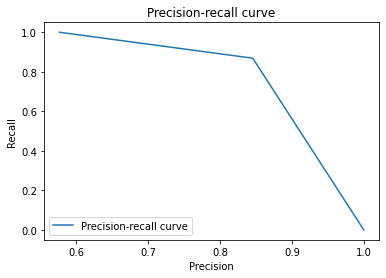

In [50]:
from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(y_test, y_pred1)

#create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

from sklearn.metrics import average_precision_score
print('average_precision_score',average_precision_score(y_test, y_pred1))